# AirBnb New York Price Affecting Factor Analysis

Airbnb is an online marketplace connecting people who want to rent their houses and those who want to rent a home.

AirBnb gets a percentage-based commission for every transaction that happens on their platform.

In this analysis, we will examine AirBnb New York rental data.

The main focus of this analysis would be to decide which factors have an impact on the prices. In this way, listers can decide the optimal price they can ask for their places.

- First we will start with importing necessary libraries and our listing data.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import datetime as dt
import folium
from folium.plugins import HeatMap

In [2]:
listings = pd.read_csv('data/airbnb_nyc.csv')

# Checking first rows to see if everything is correct.

listings.head()

,id,name,summary,description,experiences_offered,neighborhood_overview,transit,house_rules,host_id,host_since,...,hot_tub_sauna_or_pool,internet,long_term_stays,pets_allowed,private_entrance,secure,self_check_in,smoking_allowed,accessible,event_suitable
0,2539,Clean & quiet apt home by the park,Renovated apt home in elevator building.,Renovated apt home in elevator building. Spaci...,none,Close to Prospect Park and Historic Ditmas Park,Very close to F and G trains and Express bus i...,-The security and comfort of all our guests is...,2787,39698.0,...,-1,1,1,-1,-1,1,1,-1,1,1
1,3647,THE VILLAGE OF HARLEM....NEW YORK !,NaN,WELCOME TO OUR INTERNATIONAL URBAN COMMUNITY T...,none,NaN,NaN,Upon arrival please have a legibile copy of yo...,4632,39777.0,...,-1,1,-1,-1,-1,-1,-1,-1,-1,-1
2,7750,Huge 2 BR Upper East Cental Park,NaN,Large Furnished 2BR one block to Central Park...,none,NaN,NaN,NaN,17985,39953.0,...,-1,1,-1,1,-1,-1,-1,-1,-1,-1
3,8505,Sunny Bedroom Across Prospect Park,Just renovated sun drenched bedroom in a quiet...,Just renovated sun drenched bedroom in a quiet...,none,Quiet and beautiful Windsor Terrace. The apart...,Ten minutes walk to the 15th sheet F&G train s...,- No shoes in the house - Quiet hours after 11...,25326,40006.0,...,-1,1,-1,-1,-1,-1,-1,-1,-1,-1
4,8700,Magnifique Suite au N de Manhattan - vue Cloitres,Suite de 20 m2 a 5 min des 2 lignes de metro a...,Suite de 20 m2 a 5 min des 2 lignes de metro a...,none,NaN,Metro 1 et A,NaN,26394,40014.0,...,-1,1,-1,-1,-1,-1,-1,-1,-1,-1


You can find data dictionary [here.](https://docs.google.com/spreadsheets/d/1iWCNJcSutYqpULSQHlNyGInUvHg2BoUGoNRIGa6Szc4/edit#gid=982310896)

In [3]:
list(listings.columns)

['id',
 'name',
 'summary',
 'description',
 'experiences_offered',
 'neighborhood_overview',
 'transit',
 'house_rules',
 'host_id',
 'host_since',
 'host_response_time',
 'host_response_rate',
 'host_is_superhost',
 'host_listings_count',
 'host_identity_verified',
 'street',
 'neighbourhood',
 'latitude',
 'longitude',
 'property_type',
 'room_type',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'bed_type',
 'amenities',
 'price',
 'guests_included',
 'extra_people',
 'minimum_nights',
 'calendar_updated',
 'has_availability',
 'availability_30',
 'availability_60',
 'availability_90',
 'availability_365',
 'number_of_reviews',
 'number_of_reviews_ltm',
 'review_scores_rating',
 'review_scores_accuracy',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value',
 'instant_bookable',
 'cancellation_policy',
 'calculated_host_listings_count',
 'calculated_host_listings_count_entire_homes',
 'calcul

## 1. Data Preparation and Initial Cleaning

Before analysing the data, first we will check our data types and values. Our aim is converting data types if they are not correct and find out Null values and decide what can we do about them.

In [4]:
# Checking data types of the columns.
listings.info()
listings.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30179 entries, 0 to 30178
Data columns (total 81 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            30179 non-null  int64  
 1   name                                          30166 non-null  object 
 2   summary                                       28961 non-null  object 
 3   description                                   29575 non-null  object 
 4   experiences_offered                           30179 non-null  object 
 5   neighborhood_overview                         18113 non-null  object 
 6   transit                                       18190 non-null  object 
 7   house_rules                                   16623 non-null  object 
 8   host_id                                       30179 non-null  int64  
 9   host_since                                    30170 non-null 

(30179, 81)

In [5]:
#Checking null values.
listings[listings.columns[listings.isnull().any()]].isnull().sum()

name                              13
summary                         1218
description                      604
neighborhood_overview          12066
transit                        11989
house_rules                    13556
host_since                         9
host_response_time             13097
host_response_rate             13097
host_is_superhost                  9
host_listings_count                9
host_identity_verified             9
neighbourhood                      9
review_scores_rating            9085
review_scores_accuracy          9111
review_scores_cleanliness       9101
review_scores_checkin           9129
review_scores_communication     9110
review_scores_location          9132
review_scores_value             9130
reviews_per_month               8260
dtype: int64

- With checking our data with info function, we can say all data types are true and good to work with.
- We can see for some columns, we have null values. The shape of the data is 30.179 x 81, so we can see some columns' values 
are less than 30.179

In [6]:
# Checking for rows with all null values
listings[listings.isna().all(axis=1)]

,id,name,summary,description,experiences_offered,neighborhood_overview,transit,house_rules,host_id,host_since,...,hot_tub_sauna_or_pool,internet,long_term_stays,pets_allowed,private_entrance,secure,self_check_in,smoking_allowed,accessible,event_suitable


We checked if there are any rows with all values null to drop them. As we can see in the above, it was not the case. So we can now check for every null values in every rows.

In [7]:
# Checking for rows with null values
listings[listings.isna().any(axis=1)]

,id,name,summary,description,experiences_offered,neighborhood_overview,transit,house_rules,host_id,host_since,...,hot_tub_sauna_or_pool,internet,long_term_stays,pets_allowed,private_entrance,secure,self_check_in,smoking_allowed,accessible,event_suitable
1,3647,THE VILLAGE OF HARLEM....NEW YORK !,NaN,WELCOME TO OUR INTERNATIONAL URBAN COMMUNITY T...,none,NaN,NaN,Upon arrival please have a legibile copy of yo...,4632,39777.0,...,-1,1,-1,-1,-1,-1,-1,-1,-1,-1
2,7750,Huge 2 BR Upper East Cental Park,NaN,Large Furnished 2BR one block to Central Park...,none,NaN,NaN,NaN,17985,39953.0,...,-1,1,-1,1,-1,-1,-1,-1,-1,-1
4,8700,Magnifique Suite au N de Manhattan - vue Cloitres,Suite de 20 m2 a 5 min des 2 lignes de metro a...,Suite de 20 m2 a 5 min des 2 lignes de metro a...,none,NaN,Metro 1 et A,NaN,26394,40014.0,...,-1,1,-1,-1,-1,-1,-1,-1,-1,-1
5,11943,Country space in the city,NaN,Ditmas Park. Entire 3rd floor. 2 large rooms ...,none,NaN,NaN,"No smoking, no cooking on 3rd floor",45445,40098.0,...,-1,1,-1,-1,-1,-1,-1,-1,-1,-1
6,12299,Beautiful Sunny Park Slope Brooklyn,NaN,This is a large one bedroom apartment located ...,none,NaN,NaN,NaN,47610,40108.0,...,-1,1,-1,-1,-1,-1,-1,-1,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30174,36484363,QUIT PRIVATE HOUSE,THE PUBLIC TRANSPORTATION: THE TRAIN STATION I...,THE PUBLIC TRANSPORTATION: THE TRAIN STATION I...,none,QUIT QUIT QUIT !!!!!!,TRAIN STATION 5 MINUTE UBER OR 15 MINUTE WALK ...,"Guest should not wear shoes, no smoking mariju...",107716952,42722.0,...,-1,1,-1,-1,-1,-1,1,-1,-1,1
30175,36484665,Charming one bedroom - newly renovated rowhouse,"This one bedroom in a large, newly renovated r...","This one bedroom in a large, newly renovated r...",none,"There's an endless number of new restaurants, ...",We are three blocks from the G subway and abou...,NaN,8232441,41504.0,...,-1,1,-1,-1,1,-1,1,-1,-1,-1
30176,36485057,Affordable room in Bushwick/East Williamsburg,NaN,NaN,none,NaN,NaN,NaN,6570630,41419.0,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
30177,36485609,43rd St. Time Square-cozy single bed,NaN,NaN,none,NaN,NaN,NaN,30985759,42104.0,...,-1,1,-1,-1,-1,-1,1,-1,-1,-1


In our list, we can see host related 4 different columns have 9 null values. It is quite possible that all these values are common. So we will check those values first.

In [8]:
host_na_check = listings[['host_since','host_is_superhost','host_listings_count','host_identity_verified']]
host_na_check[host_na_check.isna().any(axis=1)]

,host_since,host_is_superhost,host_listings_count,host_identity_verified
2443,NaN,NaN,NaN,NaN
2746,NaN,NaN,NaN,NaN
4227,NaN,NaN,NaN,NaN
4685,NaN,NaN,NaN,NaN
7323,NaN,NaN,NaN,NaN
7679,NaN,NaN,NaN,NaN
15144,NaN,NaN,NaN,NaN
16823,NaN,NaN,NaN,NaN
22062,NaN,NaN,NaN,NaN


Host_since, host_is_superhost, host_listings_count and host_identity_verified only have 9 null values and they are common for all of them. 
9 rows in total 30.179 rows serve only a small portion of the data. That is why we will remove these rows.

In [9]:
#Removing common null values from host related columns.

listings = listings.dropna(axis=0,how = 'all',subset=['host_since','host_is_superhost','host_listings_count','host_identity_verified'])
listings.shape

#Our total row numbers decreased by 9.

(30170, 81)

For below values, we are not going to create any analysis. To prevent their null values affecting our analysis, we will assing Unknown to all null values. This way, we would still have sstring data for those rows.

In [10]:
listings['name'].fillna('Unknown',inplace=True)
listings['summary'].fillna('Unknown', inplace=True)
listings['description'].fillna('Unknown', inplace=True)
listings['neighborhood_overview'].fillna('Unknown', inplace=True)
listings['transit'].fillna('Unknown', inplace=True)
listings['house_rules'].fillna('Unknown', inplace=True)
listings['host_response_time'].fillna('Unknown', inplace=True)
listings['host_response_rate'].fillna('Unknown', inplace=True)
listings['neighbourhood'].fillna('Unknown', inplace=True)

We can check our data again to see which columns still have Null values.

In [11]:
listings[listings.columns[listings.isnull().any()]].isnull().sum()

review_scores_rating           9080
review_scores_accuracy         9106
review_scores_cleanliness      9096
review_scores_checkin          9124
review_scores_communication    9105
review_scores_location         9127
review_scores_value            9125
reviews_per_month              8256
dtype: int64

As we can see, we only have review related columns left. We will use Review metrics to see their relationship with price. That is why, we would fill these null values with appropriate values.
For this purpose, we will calculate means of every column and assign this value to null values.

In [12]:
#Calculating mean of every columns.
mean_subset = {}
subset = ['review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value','reviews_per_month']
for i in subset:
    mean = np.mean(listings[i])
    mean_subset[i] = mean
mean_subset

{'review_scores_rating': 93.64594594594594,
 'review_scores_accuracy': 9.567556019749336,
 'review_scores_cleanliness': 9.191990130018032,
 'review_scores_checkin': 9.694241185973581,
 'review_scores_communication': 9.713363399003086,
 'review_scores_location': 9.553533241457966,
 'review_scores_value': 9.370064148253743,
 'reviews_per_month': 0.7974751300538468}

In [13]:
#Filling null values with mean values

for idx, row in listings.iterrows():
    for i in subset:
        value = row[i]
        if np.isnan(value):
            listings.loc[idx, i] = mean_subset[i]

Let's do a final check if our data is clean now.

In [14]:
listings[listings.columns[listings.isnull().any()]].isnull().sum()

Series([], dtype: float64)

Since we don't have any null values, we can start analyzing our data.

 ## 2. Checking Values and Their Correlations

Let's start with checking our main column, price.

In [15]:
listings['price'].describe()

count    30170.000000
mean       132.955254
std         93.151717
min          0.000000
25%         65.000000
50%        100.000000
75%        175.000000
max        500.000000
Name: price, dtype: float64

- We can see that, we have some 0 values in price column. We will check for which values, we have zero values.

In [16]:
listings[listings['price'] == 0]

,id,name,summary,description,experiences_offered,neighborhood_overview,transit,house_rules,host_id,host_since,...,hot_tub_sauna_or_pool,internet,long_term_stays,pets_allowed,private_entrance,secure,self_check_in,smoking_allowed,accessible,event_suitable
12463,18750597,"Huge Brooklyn Brownstone Living, Close to it all.","Great, Brooklyn, Brownstown. Large and bright ...","Great, Brooklyn, Brownstown. Large and bright ...",none,The neighborhood is friendly and lively. There...,This is a great location for every type of pub...,No parties,8993084,41539.0,...,1,1,1,-1,1,-1,1,-1,-1,1
13911,20523843,"MARTIAL LOFT 3: REDEMPTION (upstairs, 2nd room)",We're located in a beautiful newly renovated t...,We're located in a beautiful newly renovated t...,none,"There are many nice venues, bars, coffee shops...","We are conveniently located near the J, M, and...",Unknown,15787004,41779.0,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
13987,20608117,"Sunny, Quiet Room in Greenpoint",Queen size bed in bedroom overlooking the back...,Queen size bed in bedroom overlooking the back...,none,Maybe I'm biased but Greenpoint is the best ne...,I am 15 minute walk from the L train Graham st...,Please be respectful of the space. This is my ...,1641537,40931.0,...,-1,1,1,-1,1,-1,-1,-1,1,-1
14002,20624541,Modern apartment in the heart of Williamsburg,Minimalist loft apartment with a stylish balco...,Minimalist loft apartment with a stylish balco...,none,Want to experience New York but Brooklyn style...,"Metro is best, taxi/uber/ lyft are at your doo...",The apartment is a smoke and drug free environ...,10132166,41597.0,...,-1,1,-1,-1,1,-1,-1,-1,-1,-1
14607,21291569,Coliving in Brooklyn! Modern design / Shared room,"Newly renovated, modern, spacious Outpost Club...","Newly renovated, modern, spacious Outpost Club...",none,Bushwick is a modern neighborhood in the north...,"Halsey Street Station for J and Z train, Knick...",1) Price is per person – stay overnight is sin...,101970559,42674.0,...,-1,1,1,-1,-1,-1,1,-1,-1,-1
14621,21304320,Best Coliving space ever! Shared room.,The Outpost Club Co-Living residences are a be...,The Outpost Club Co-Living residences are a be...,none,Bushwick is a working-class neighborhood in th...,The Co-living is literally few blocks from the...,1) Price is per person – stay overnight is sin...,101970559,42674.0,...,-1,1,1,-1,-1,-1,1,-1,-1,-1


We currently have only 6 columns with price value is 0. This is %0,02 of the whole data. Since it is a small portion of it, we can drop these columns.

In [17]:
#Dropping rows with 0 price value.

listings = listings[listings['price'] != 0]
listings.shape

(30164, 81)

Since we removed zeros in price column, we can check basic statistics again.

In [18]:
listings['price'].describe()

count    30164.000000
mean       132.981700
std         93.142103
min         10.000000
25%         65.000000
50%        100.000000
75%        175.000000
max        500.000000
Name: price, dtype: float64

We have a broad price range from 10 to 500. But we can see that our mean is 132.98, so the frequency from 100 to 500 is not that strong.

Text(0, 0.5, 'Number of Places')

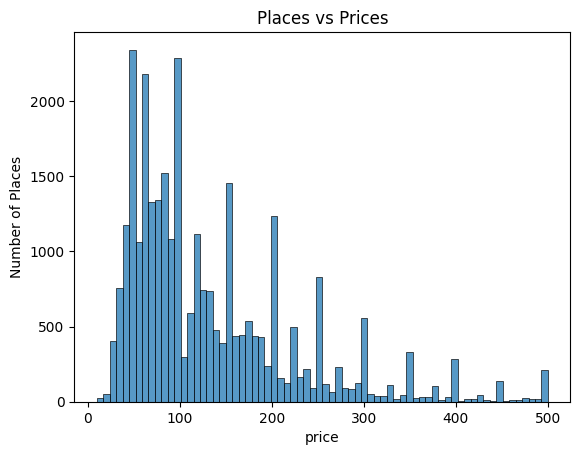

In [19]:
sns.histplot(data = listings['price'])
plt.title('Places vs Prices')
plt.ylabel('Number of Places')

In [20]:
listings['price'].value_counts(bins = 10)

(59.0, 108.0]     9901
(9.509, 59.0]     5982
(108.0, 157.0]    5480
(157.0, 206.0]    3753
(206.0, 255.0]    2097
(255.0, 304.0]    1252
(304.0, 353.0]     636
(353.0, 402.0]     526
(451.0, 500.0]     294
(402.0, 451.0]     243
Name: price, dtype: int64

We can also see this in the graph,most of the places offered around 100 dolars.
Also, we can see small picks for 300 - 400 and 500 dollars, we might have a look which features these places offer to have a better understanding why people would like to pay more.

Before checking different features and their correlation for price, let's conduct a heat map. Location is one of the main factor for pricing. So it is also a good starting point.

In [21]:
#Calculation mean latitude and longitue for conducting the map.

mean_longitude = np.mean(listings['longitude'])
mean_latitude = np.mean(listings['latitude'])

In [22]:
p_map = folium.Map(
location = [mean_latitude, mean_longitude],
    tiles = 'Open Street Map',
    zoom_start = 10
)

In [23]:
p_map.add_child(
HeatMap(
listings[['latitude','longitude','price']],
radius = 8,
min_opacity = 3.5,
blur = 13,
zoom = 55))



folium.Marker(
    location=[40.785091,-73.968285], 
    popup="Central Park",
    icon=folium.Icon(icon='bookmark', icon_color="white", prefix="fa")
).add_to(p_map)

folium.Marker(
    location=[40.748817,-73.985428], 
    popup="Empire State Building",
    icon=folium.Icon(icon='bookmark', icon_color="white", prefix="fa")
).add_to(p_map)

folium.Marker(
    location=[40.689249,-74.044500], 
    popup="Statue of Liberty",
    icon=folium.Icon(icon='bookmark', icon_color="white", prefix="fa")
).add_to(p_map)

folium.Marker(
    location=[40.758896,-73.985130], 
    popup="Times Square",
    icon=folium.Icon(icon='bookmark', icon_color="white", prefix="fa")
).add_to(p_map)


p_map

Not surprisingly, we find that centrally located places are more expensive.

<AxesSubplot: xlabel='price'>

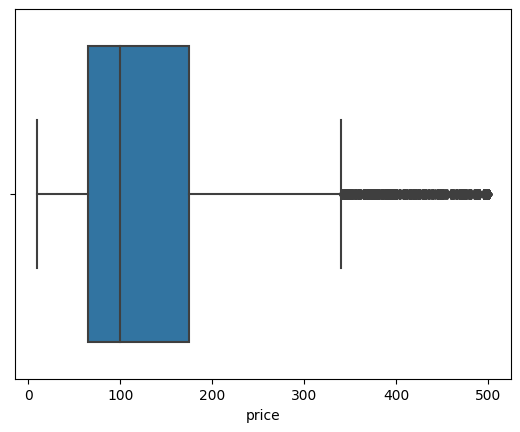

In [24]:
sns.boxplot(
    data=listings,
    x="price"
)

If we plot a box graph, we can see that even though our price range generally lay between 80 to 160, there are outliers.

So let's check the outliers with a heat map to see their relationship with location.

In [25]:
# Creating a new data frame with rows whose price is greater than %95 of all values.

outliers = listings['price'].quantile(0.95)
outliers_df = listings[listings['price']>= outliers]
outliers_df

,id,name,summary,description,experiences_offered,neighborhood_overview,transit,house_rules,host_id,host_since,...,hot_tub_sauna_or_pool,internet,long_term_stays,pets_allowed,private_entrance,secure,self_check_in,smoking_allowed,accessible,event_suitable
20,26933,2 BR / 2 Bath Duplex Apt with patio! East Village,***PLEASE DO NOT MAKE RESERVATION REQUEST UNTI...,***PLEASE DO NOT MAKE RESERVATION REQUEST UNTI...,none,"If you like food and drink, the East Village i...",Walking is the safest and easiest way to get a...,"No children. If you have children, please look...",72062,40198.0,...,-1,1,-1,1,-1,-1,-1,1,1,-1
21,27659,3 Story Town House in Park Slope,Unknown,"Spacious 3000 sq ft triplex with backyard, ren...",none,Unknown,Unknown,Unknown,119588,40304.0,...,-1,-1,-1,-1,1,-1,-1,-1,-1,-1
35,45910,Beautiful Queens Brownstone! - 5BR,Unknown,"Beautiful, fully furnished and equipped, brown...",none,Unknown,Unknown,"NO SMOKING, NO PETS, NO PARTIES. QUIET, RESPEC...",204539,40407.0,...,-1,1,1,-1,-1,-1,-1,-1,-1,-1
67,79067,Lovely 3 bedroom in Italianate Brownstone w/ga...,This gorgeous fully-renovated duplex 3 bedroom...,This gorgeous fully-renovated duplex 3 bedroom...,none,Fort Greene/Clinton Hill was voted Brooklyn's ...,Five minute walk to C train or G train. 20 mi...,This is our home and we invite you to treat it...,425506,40608.0,...,-1,1,1,1,-1,-1,1,-1,-1,-1
68,80684,Duplex w/ Terrace @ Box House Hotel,This Duplex Loft Suite with a Terrace offers a...,This Duplex Loft Suite with a Terrace offers a...,none,Unknown,Located in north Greenpoint--just a 10 minute ...,We authorize a $250 USD hold to guarantee any ...,417504,40603.0,...,-1,1,-1,-1,-1,1,1,-1,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30056,36419291,Wyndham Midtown 45 New York City 1 Bedroom Deluxe,Gaze up at the Chrysler Building from the roof...,Gaze up at the Chrysler Building from the roof...,none,NEARBY ATTRACTIONS: •\tRockefeller Center - 0....,"In the heart of vibrant midtown Manhattan, Wyn...",Unknown,273812306,43651.0,...,-1,1,-1,-1,-1,-1,-1,-1,-1,-1
30058,36420289,"Rustic Garden House Apt, 2 stops from Manhattan","Private 3 Bedroom Garden Apartment, 1 Bath, St...","Private 3 Bedroom Garden Apartment, 1 Bath, St...",none,Unknown,Unknown,No Loud noises after 11 PM,73211393,42511.0,...,-1,1,-1,-1,-1,-1,-1,-1,-1,-1
30127,36450896,Brand New 3-Bed Apt in the Best Location of FiDi,Brand New 3 Bedroom Spacious&Modern home in do...,Brand New 3 Bedroom Spacious&Modern home in do...,none,"Very safe neighborhood, walking distance to ev...",1 mins to subway,Unknown,29741813,42084.0,...,-1,1,-1,-1,1,-1,-1,-1,-1,-1
30134,36453160,LUXURY MANHATTAN PENTHOUSE+HUDSON RIVER+EMPIRE...,Breathtaking NEW PENTHOUSE APARTMENT with Huds...,Breathtaking NEW PENTHOUSE APARTMENT with Huds...,none,Unknown,Unknown,Unknown,224171371,43408.0,...,-1,1,-1,-1,-1,-1,-1,-1,-1,-1


In [26]:
outliers_longitude_mean = np.mean(outliers_df['longitude'])
outliers_latitude_mean = np.mean(outliers_df['latitude'])

In [27]:
outliers_map = folium.Map(
location = [outliers_latitude_mean, outliers_longitude_mean],
tiles = 'Open Street Map',
zoom_start = 10)

In [28]:
outliers_map.add_child(
HeatMap(
listings[['latitude','longitude','price']],
radius = 8,
min_opacity = 0.2,
blur = 15,
zoom = 2))


folium.Marker(
    location=[40.785091,-73.968285], 
    popup="Central Park",
    icon=folium.Icon(icon='bookmark', icon_color="white", prefix="fa")
).add_to(outliers_map)

folium.Marker(
    location=[40.748817,-73.985428], 
    popup="Empire State Building",
    icon=folium.Icon(icon='bookmark', icon_color="white", prefix="fa")
).add_to(outliers_map)

folium.Marker(
    location=[40.689249,-74.044500], 
    popup="Statue of Liberty",
    icon=folium.Icon(icon='bookmark', icon_color="white", prefix="fa")
).add_to(outliers_map)

folium.Marker(
    location=[40.758896,-73.985130], 
    popup="Times Square",
    icon=folium.Icon(icon='bookmark', icon_color="white", prefix="fa")
).add_to(outliers_map)

outliers_map

We can see that the most expensive outliers are located near famous sights like Central Park, Times Square and Empire State Building.

Location isn't something that we can directly effect or change. So let's contunie checking other variables to see their correlations.

- Price and Review Correlations

In [29]:
review_cor = listings[['price','number_of_reviews','review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value']]

In [30]:
review_cor.corr()

,price,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
price,1.000000,-0.029143,0.051352,0.026532,0.076480,0.011346,0.013785,0.112563,-0.004826
number_of_reviews,-0.029143,1.000000,0.055240,0.076255,0.080494,0.072883,0.078149,0.044384,0.067527
review_scores_rating,0.051352,0.055240,1.000000,0.743929,0.719882,0.583073,0.640837,0.476046,0.762090
review_scores_accuracy,0.026532,0.076255,0.743929,1.000000,0.610907,0.581180,0.596838,0.432964,0.686725
review_scores_cleanliness,0.076480,0.080494,0.719882,0.610907,1.000000,0.437835,0.463474,0.360401,0.620427
review_scores_checkin,0.011346,0.072883,0.583073,0.581180,0.437835,1.000000,0.647245,0.385930,0.516473
review_scores_communication,0.013785,0.078149,0.640837,0.596838,0.463474,0.647245,1.000000,0.420113,0.569614
review_scores_location,0.112563,0.044384,0.476046,0.432964,0.360401,0.385930,0.420113,1.000000,0.486130
review_scores_value,-0.004826,0.067527,0.762090,0.686725,0.620427,0.516473,0.569614,0.486130,1.000000


We can see that there is no correlation between price and reviews. This might be a reason that cheaper places would have higher customer turn over, that is why their number of review would be higher.

- Price and Accommodates Correlation

In [31]:
acco_cor = pd.DataFrame()
acco_cor = listings[['accommodates','price']].copy()
acco_cor['price_per_person'] = acco_cor['price'] / acco_cor['accommodates']
acco_cor = acco_cor.groupby(acco_cor['accommodates']).mean()
acco_cor

,price,price_per_person
accommodates,,
1,69.216402,69.216402
2,108.382982,54.191491
3,149.829253,49.943084
4,183.775414,45.943853
5,218.861001,43.772200
6,248.519044,41.419841
7,264.866412,37.838059
8,284.072327,35.509041
9,282.693878,31.410431


We can see that price is increasing when accommodates increase but conversely price per person decreases for every new person.

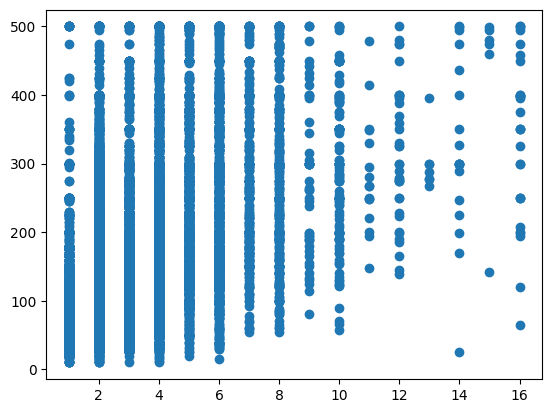

In [32]:
plt.scatter(listings['accommodates'],listings['price'])

In [33]:
condt_cor = listings[['price','guests_included','extra_people','minimum_nights','calendar_updated']]
condt_cor.corr(numeric_only='False')

,price,guests_included,extra_people,minimum_nights
price,1.000000,0.321977,0.075707,0.048861
guests_included,0.321977,1.000000,0.309640,-0.042805
extra_people,0.075707,0.309640,1.000000,-0.076951
minimum_nights,0.048861,-0.042805,-0.076951,1.000000


Text(0, 0.5, 'Number of guest')

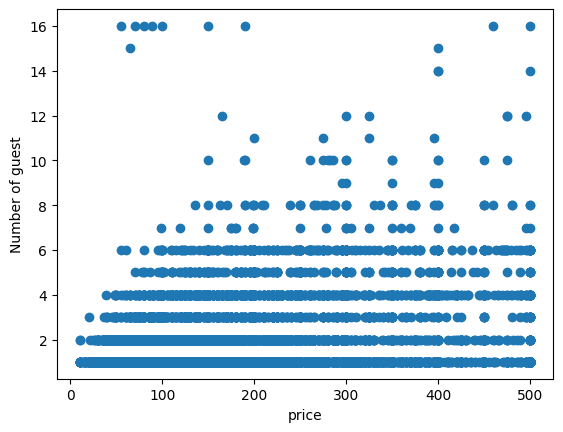

In [34]:
plt.scatter(listings['price'],listings['guests_included'])
plt.xlabel('price')
plt.ylabel('Number of guest')

We can see that guest including and price have a positive correlation. 
Adding guest include features would be a strategy for some places for increasing their listing prices.

- Price and Specific Features Correlations

In [35]:
feature_cor = listings[['price','check_in_24h','air_conditioning','high_end_electronics','bbq','balcony','nature_and_views','bed_linen','breakfast','tv','coffee_machine','cooking_basics','white_goods','elevator','gym','child_friendly','parking','outdoor_space','host_greeting','hot_tub_sauna_or_pool','internet','long_term_stays','pets_allowed','private_entrance','secure','self_check_in','smoking_allowed','accessible','event_suitable']]
feature_cor.corr()

,price,check_in_24h,air_conditioning,high_end_electronics,bbq,balcony,nature_and_views,bed_linen,breakfast,tv,...,hot_tub_sauna_or_pool,internet,long_term_stays,pets_allowed,private_entrance,secure,self_check_in,smoking_allowed,accessible,event_suitable
price,1.000000,0.053106,0.196507,0.027593,0.110890,0.079857,0.000142,0.105665,0.007415,0.271680,...,0.065268,0.024034,0.096922,0.070452,0.146788,0.019588,0.109198,-0.054258,0.038599,0.012829
check_in_24h,0.053106,1.000000,0.031906,0.005864,-0.021930,-0.027115,-0.017325,-0.030574,-0.026182,0.051983,...,0.036733,0.026549,0.000291,0.061552,-0.077328,0.067559,0.040019,0.008693,0.085486,0.006198
air_conditioning,0.196507,0.031906,1.000000,0.017508,0.054233,0.061562,0.014038,0.099722,0.024524,0.223231,...,0.031484,0.141368,0.104112,0.032990,0.063451,0.034896,0.094332,-0.026222,0.042689,0.005923
high_end_electronics,0.027593,0.005864,0.017508,1.000000,0.085469,0.084840,0.048874,0.066558,0.006313,0.050958,...,-0.001823,0.003578,0.037852,0.034538,0.009523,0.008822,0.034660,0.021048,0.057586,0.006603
bbq,0.110890,-0.021930,0.054233,0.085469,1.000000,0.349930,0.041924,0.219576,-0.015857,0.072415,...,0.041886,0.025832,0.216755,0.140006,0.099351,0.011214,0.122489,0.030198,0.057704,0.038723
balcony,0.079857,-0.027115,0.061562,0.084840,0.349930,1.000000,0.088741,0.234346,-0.009709,0.051154,...,0.052629,0.025471,0.182002,0.060432,0.098951,0.016514,0.115519,0.028499,0.080385,0.031578
nature_and_views,0.000142,-0.017325,0.014038,0.048874,0.041924,0.088741,1.000000,0.059185,0.024108,0.004935,...,0.044355,-0.000764,0.094680,-0.000496,0.036254,-0.001113,0.031946,0.003126,0.072347,0.012202
bed_linen,0.105665,-0.030574,0.099722,0.066558,0.219576,0.234346,0.059185,1.000000,-0.023319,0.107232,...,0.007250,0.048059,0.406590,0.059651,0.172643,-0.004888,0.216343,-0.023768,0.113175,0.001179
breakfast,0.007415,-0.026182,0.024524,0.006313,-0.015857,-0.009709,0.024108,-0.023319,1.000000,0.033860,...,0.030092,0.010478,-0.035476,0.016132,0.043436,0.076557,0.024899,0.023579,0.021401,0.028791
tv,0.271680,0.051983,0.223231,0.050958,0.072415,0.051154,0.004935,0.107232,0.033860,1.000000,...,0.001817,0.117121,0.101647,0.067393,0.082452,0.033946,0.087632,-0.006746,0.057014,0.012202


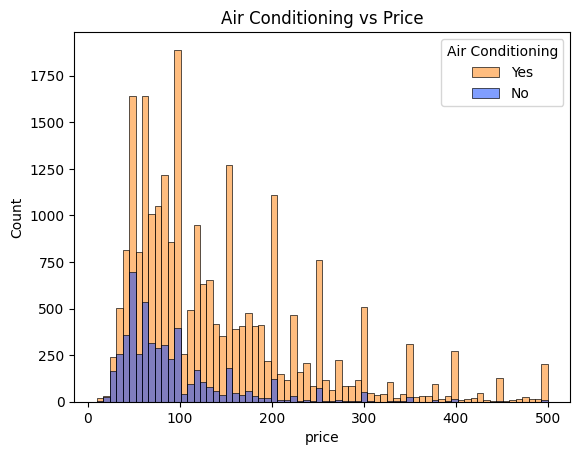

In [36]:
sns.histplot(
    data = listings,
    x ='price',
    hue = 'air_conditioning',
    palette='bright',
    legend = True)
plt.legend(title='Air Conditioning', loc='upper right',labels=['Yes','No'])
plt.title('Air Conditioning vs Price')
plt.show()

Text(0.5, 1.0, 'TV vs Price')

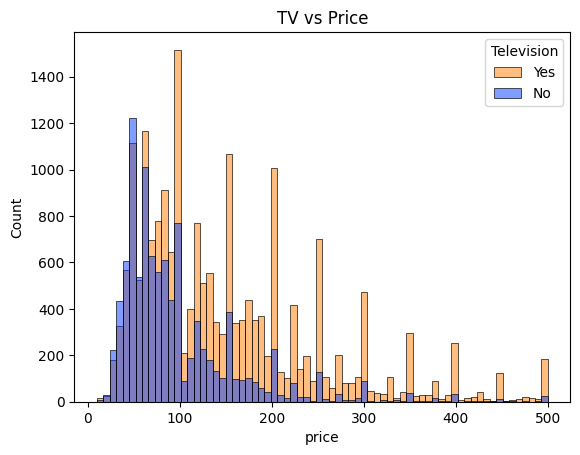

In [37]:
sns.histplot(
data = listings,
x = 'price',
hue = 'tv',
palette = 'bright',
legend = False)
plt.legend(title='Television', loc='upper right', labels=['Yes', 'No'])

plt.title('TV vs Price')

Text(0.5, 1.0, 'White Goods vs Price')

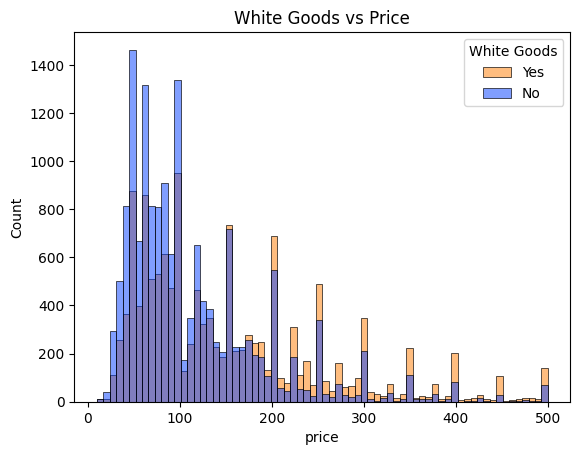

In [38]:
sns.histplot(
data = listings,
x = 'price',
hue = 'white_goods',
palette='bright')
plt.legend(title='White Goods', loc='upper right', labels=['Yes', 'No'])

plt.title('White Goods vs Price')

Text(0.5, 1.0, 'Child Friendly vs Price')

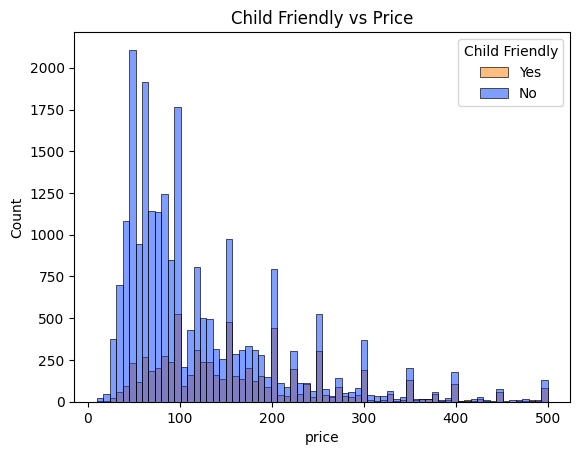

In [39]:
sns.histplot(
data = listings,
x = 'price',
hue = 'child_friendly',
palette = 'bright')
plt.legend(title='Child Friendly', loc='upper right', labels=['Yes', 'No'])

plt.title('Child Friendly vs Price')

We can see from the above graphs that air conditioning, television and white goods higher correlation with the price compared to other features. This might be a useful insight for places whose aim is increasing their prices.

Also, we can see people tend to pay higher for Child-Friendly places. This also would be a good strategy.

## 3. Conculusion

In this exploratory data analysis (EDA) we used Airbnb - New York dataset to determine which factors have an effect on prices. In this way, we could advise which strategies owners can use to increase their listing prices.

We can see price and location have a positive correlation which is not a surprising outcome but unfortunately it is something that owners can affect. We also see that most of the outlier places are located near to famous places in New York.

We also checked Review metrics and their correlations eventually they don't have it. It might be the reason that turns over of cheaper places would be higher.

Lastly, we checked specific features and their correlations. According to our correlation table, we can see air conditioning, television and white goods have a positive correlation. Owners who want to increase their listing prices can add those features. Also, people tend to pay more for child-friendly places.

## 4. Next Steps

For further steps, date-related data can be examined as well to see seasonal effects.
Also as we can see price has a relation with location factor, with more time we can check our features based on the most popular locations.